## Messing around with a Classifier:

Need to distinguish CSD from Non-CSD

In [177]:
## First build dataset: 
import os
import pickle
from pose_class import Trajectory
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

playback_df = pd.read_csv('/data/birds/postures/presentation_info4.csv',delimiter=',')

seq_dir = './CrapSeqs/'
non_list,csd_list = [],[]
part_list = []
potent_list,weak_list = [],[]
n_bins = 100

BLOCK = True
R_HIGH = 0.5
R_LOW = .3
high_list,low_list = [],[]
potent_song = ['BDY','ND']
weak_song = ['LB','DMG','BOD','DBR']

#print(playback_df)
if False:
    for f in os.listdir(seq_dir):
        #print(f)
        seq = pickle.load(open(seq_dir + f,'rb'))
        if 'floor' in seq.notes:
            continue
        if seq.offset == 0:
            continue
        if seq.posture == 2:
            print('crap partial!')
        neg_index = np.argmax(seq.ts >= -1)
        zero_index = np.argmax(seq.ts >= 0)
        four_index = np.argmax(seq.ts >= 4)
        bins = np.linspace(neg_index,four_index,n_bins,dtype=int)

        tail_bins = seq.smooth_data[bins,3,2]
        #print(seq.smooth_data[bins,3,2])
        if False:
            fig,ax = plt.subplots()
            ax.plot(tail_bins)
            fig.show()
        non_list.append(tail_bins)

        
for f in os.listdir('./AllSeqs/'):
    seq = pickle.load(open('./AllSeqs/' + f,'rb'))
    if 'floor' in seq.notes:
        continue
    if seq.offset == 0:
        continue
    NON = False
    if seq.posture == 2:
        print('partial!')
        PART = True
    elif seq.posture == 1:
        PART = False
        #print(seq.song)
    else:
        #print('Non-posture!')
        NON = True
        PART = False
    neg_index = np.argmax(seq.ts >= -1)
    zero_index = np.argmax(seq.ts >= 0)
    four_index = np.argmax(seq.ts >= 4)    
    bins = np.linspace(neg_index,four_index,n_bins,dtype=int)
    tail_bins = seq.smooth_data[bins,3,2]
    if PART:
        part_list.append(tail_bins)
    elif NON:
        non_list.append(tail_bins)
    else:
        csd_list.append(tail_bins)
        if seq.song in potent_song:
            potent_list.append(tail_bins)
        elif seq.song in weak_song:
            weak_list.append(tail_bins)
    if seq.posture and BLOCK:
        print(seq.seq_name)
        seq_row = playback_df[playback_df['SeqName'] == seq.seq_name]
        seq_block = seq_row['Block'].item()
        seq_bird = seq_row['Bird'].item()
        print(seq_bird,seq_block)
        bird_df = playback_df[playback_df['Bird'] == seq_bird]
        bird_block_df = bird_df[bird_df['Block'] == seq_block]
        resp_block = np.array(bird_block_df['Posture'])
        resp_block[resp_block == 2] = 0
        resp_rate = np.nanmean(resp_block)
        print(resp_rate)
        if resp_rate >= R_HIGH:
            high_list.append(tail_bins)
        elif resp_rate <= R_LOW:
            low_list.append(tail_bins)

    if False:
        fig,ax = plt.subplots()
        ax.plot(tail_bins)
        fig.show()



2019-06-11-10-05-01_BDY
CB-Yellow 10.0
0.4
partial!
2019-06-19-15-32-54_LB
CB-Orange 3.0
0.6666666666666666
2019-06-18-10-03-22_2M
CB-Orange 2.0
0.7
2019-05-30-08-34-17_BOD
CB-Yellow 0.0
0.9
2019-06-29-17-16-15_GRG
CB-Y2 11.0
0.8
partial!
2019-05-24-07-02-40_GRG
CB-Red 2.0
0.0
partial!
2019-06-08-15-46-12_GRG
CB-LB2 4.0
0.09090909090909091
2019-06-10-11-46-12_ND
CB-LB2 6.0
0.4
2019-06-24-11-34-47_LNR
CB-Orange 7.0
0.7777777777777778
2019-06-27-07-16-18_WG
CB-Y2 9.0
0.625
partial!
2019-06-18-18-34-04_WG
CB-Orange 2.0
0.7
2019-06-18-08-46-14_2M
CB-Y2 1.0
0.8888888888888888
2019-06-26-10-03-28_WG
CB-Orange 8.0
0.7
2019-06-27-17-16-13_DMG
CB-Y2 9.0
0.625
2019-06-13-18-39-57_BDY
CB-Yellow 12.0
0.4166666666666667
2019-06-14-15-46-14_BDY
CB-LB2 9.0
0.1
2019-06-19-15-46-14_BOD
CB-Y2 2.0
0.6666666666666666
2019-05-30-07-07-56_GRG
CB-Yellow 0.0
0.9
2019-05-30-11-32-53_LNR
CB-Yellow 0.0
0.9
2019-06-27-08-33-36_LB
CB-Orange 9.0
0.5
partial!
2019-06-24-10-16-15_DBR
CB-Y2 6.0
0.5555555555555556
2019

In [150]:
## Prep CSD Arrays
print(len(non_list),len(csd_list))

non_array = np.array(non_list)
part_array = np.array(part_list)
csd_array = np.array(csd_list)
max_balance = min(len(non_array),len(csd_array))

non_balance = non_array[:max_balance]
csd_balance = csd_array[:max_balance]

csd_array = csd_balance
non_array = non_balance

print(non_array.shape,csd_array.shape)
total_counts = len(non_array) + len(csd_array)
keys = np.zeros(total_counts)
keys[:len(csd_array)] = 1

y = keys
all_data = np.vstack([csd_array,non_array])

X = all_data
X_train = all_data[0::2]
X_test = all_data[1::2]
y_train = y[0::2]
y_test = y[1::2]

print(len(X_train),len(X_test))

192 130
(130, 100) (130, 100)
130 130


In [159]:
## Prep song arrays
len(potent_list),len(weak_list)
potent_array = np.array(potent_list)
weak_array = np.array(weak_list)
max_balance = min(len(potent_array),len(weak_array))

potent_array = potent_array[:max_balance]
weak_array = weak_array[:max_balance]

Sx = np.vstack([potent_array,weak_array])
Sy = np.zeros(len(Sx))
Sy[:max_balance] = 1

Sx_train = Sx[0::2]
Sx_test = Sx[1::2]

Sy_train = Sy[0::2]
Sy_test = Sy[1::2]

In [178]:
## Prep high/low arrays
print(len(high_list),len(low_list))
low_array = np.array(low_list)
high_array = np.array(high_list)
max_balance = min(len(high_array),len(low_array))

high_array = high_array[:max_balance]
low_array = low_array[:max_balance]

Rx = np.vstack([high_array,low_array])
Ry = np.zeros(len(Rx))
Ry[:max_balance] = 1

Rx_train = Rx[0::2]
Rx_test = Rx[1::2]

Ry_train = Ry[0::2]
Ry_test = Ry[1::2]

86 24


In [141]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

round(LR.score(X_test,y_test),4)

0.8462

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


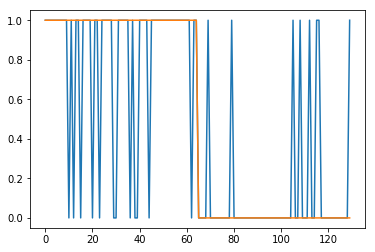

In [142]:
predictions = LR.predict(X_test)
print(predictions)
fig,ax = plt.subplots()
ax.plot(range(len(X_test)),predictions)
ax.plot(range(len(X_test)),y_test)

fig.show()


0.8923
(array([-1.,  0.,  1.]), array([  8, 116,   6]))


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


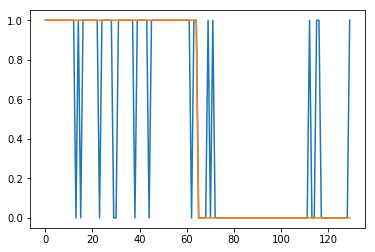

In [143]:
from sklearn import svm

SVM = svm.LinearSVC()
SVM.fit(X_train,y_train)
print(round(SVM.score(X_test,y_test),4))

predictions = SVM.predict(X_test)
#print(predictions)
fig,ax = plt.subplots()
ax.plot(range(len(X_test)),predictions)
ax.plot(range(len(X_test)),y_test)

print(np.unique(predictions - y_test,return_counts=True))
fig.show()

In [144]:
from sklearn.ensemble import RandomForestClassifier as RFC

RF = RFC(n_estimators=200,max_depth=2, random_state=0)
RF.fit(X_train,y_train)
round(RF.score(X_test,y_test),4)

0.8615

In [145]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-7, hidden_layer_sizes=(1, 1), random_state=1)
NN.fit(X_train, y_train)
#NN.predict(X)
round(NN.score(X_test,y_test), 4)

0.9154

In [146]:
NN.predict(part_array)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0.])

In [147]:
X = np.vstack([csd_array[:20],part_array])
y = np.zeros(len(X))
print(X.shape)
y[:20] = 1

X_train,y_train = X[0::2],y[0::2]
X_test,y_test = X[1::2],y[1::2]

NN2 = MLPClassifier(solver = 'lbfgs',alpha=1e-5,hidden_layer_sizes=[1,1],random_state=1)
NN2.fit(X,y)
print(round(NN2.score(X,y),4))


(40, 100)
0.5


In [148]:
SVM = svm.LinearSVC()
SVM.fit(X_train,y_train)
print('svm:',round(SVM.score(X_test,y_test),4))

RF = RFC(n_estimators=200,max_depth=2, random_state=0)
RF.fit(X_train,y_train)
print('RF:',round(RF.score(X_test,y_test),4))

LR = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)
print('LR:',round(LR.score(X_test,y_test),4))

svm: 0.95
RF: 0.95
LR: 0.95


In [160]:
SVM = svm.LinearSVC()
print(Sx_train.shape,Sy_train.shape)
SVM.fit(Sx_train,Sy_train)
print('svm:',round(SVM.score(Sx_test,Sy_test),4))

RF = RFC(n_estimators=200,max_depth=2, random_state=0)
RF.fit(Sx_train,Sy_train)
print('RF:',round(RF.score(Sx_test,Sy_test),4))

LR = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(Sx_train,Sy_train)
print('LR:',round(LR.score(Sx_test,Sy_test),4))

(37, 100) (37,)
svm: 0.4865
RF: 0.5676
LR: 0.5135


In [179]:
print(len(Rx_train))

SVM = svm.LinearSVC()
print(Rx_train.shape,Ry_train.shape)
SVM.fit(Rx_train,Ry_train)
print('svm:',round(SVM.score(Rx_test,Ry_test),4))

RF = RFC(n_estimators=200,max_depth=2, random_state=0)
RF.fit(Rx_train,Ry_train)
print('RF:',round(RF.score(Rx_test,Ry_test),4))

LR = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(Rx_train,Ry_train)
print('LR:',round(LR.score(Rx_test,Ry_test),4))

24
(24, 100) (24,)
svm: 0.5833
RF: 0.625
LR: 0.625


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 

masks = np.load('test_masks.npy')
course_masks = np.load('course_masks.npy')

fig,(ax1,ax2) = plt.subplots(2)

ax1.imshow(masks[0])
ax2.imshow(course_masks[0])

x_dim = 1024
y_dim = 1024
scale = 1./8
big_step = 1024 * scale
step = 103
points = []
for n in np.arange(0,x_dim,step):
    for m in np.arange(0,y_dim,step):
        x_course = int(n/big_step)
        y_course = int(m/big_step)
        if course_masks[0][y_course,x_course] > .1:
            if (x_course,y_course) not in points:
                points.append((x_course,y_course))

points = np.array(points)
print(points)
ax2.scatter(points[:,0],points[:,1],color='red')


fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'test_masks.npy'

In [26]:
test_dict = {}
test_dict[(1,2,3)] = 1
test_dict[(2,3,4)] = 1

False

In [32]:
(124.9 // 5) * 5

120.0

In [27]:
sample_rate = 48000
onset_df = pd.read_csv('/data/birds/postures/birdview-2019/2019-onsets-birdview.txt',header=None,delim_whitespace=True)
volume_row = onset_df[onset_df[0] == '2019-06-08-11-46-13_ND.wav.bag']
offset = volume_row[5]
print(offset.item() / 48000)

1.4345625


292


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


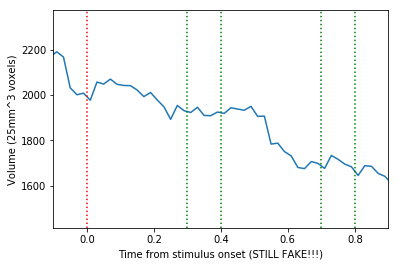

In [29]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 


#volumes = np.load('/data/birds/postures/birdview-2019/2019-06-11-08-46-12_WG_short/2019-06-11-08-46-12_WG_short_volume.npy')
volumes = np.load('/data/birds/postures/birdview-2019/2019-06-04-10-16-10_BDY_short/2019-06-04-10-16-10_BDY_short_volume.npy')
#volumes = np.load('/data/birds/postures/birdview-2019/2019-06-08-13-16-12_BDY/2019-06-08-13-16-12_BDY_volume.npy')

#volumes = np.load('/data/birds/postures/birdview-2019/2019-06-08-11-46-13_ND2019-06-08-11-46-13_ND_volume.npy')
#vol_onset = onset_df[]
print(len(volumes))
fig,ax = plt.subplots()

ax.plot(np.arange(0,len(volumes) * .02,.02) - 1.53,volumes)
ax.axvline(0,linestyle=':',color='red')

ax.axvline(0.3,linestyle=':',color='green')
ax.axvline(0.4,linestyle=':',color='green')

ax.axvline(0.7,linestyle=':',color='green')
ax.axvline(0.8,linestyle=':',color='green')
#ax.plot(volumes0,alpha=.8)
ax.set_ylabel('Volume (25mm^3 voxels)')
ax.set_xlabel('Time from stimulus onset (STILL FAKE!!!)')

ax.set_xlim([-0.1,.9])
fig.show()
#fig.savefig('/home/ammon/Desktop/PaperFigs/wingstroke_trace_close.svg')

(1024, 1024)
1.0


/home/ammon/anaconda3/envs/vak-env/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


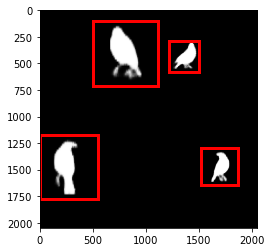

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches

masks = np.load('./2019-06-24-11-46-15_BDY_clipped/masks/masks_5.npy')
boxes = np.load('./2019-06-24-11-46-15_BDY_clipped/masks/box_5.npy')

masks = np.load('/data/birds/postures/birdview-2019/2019-06-08-13-16-12_BDY/masks/masks_371.npy')
boxes = np.load('/data/birds/postures/birdview-2019/2019-06-08-13-16-12_BDY/masks/box_371.npy')
fig,ax = plt.subplots()

#ax.imshow(np.sum(masks,0))
print(masks[0].shape)
all_mask = np.zeros([2048,2048])
all_mask[:1024,:1024] = masks[0]
all_mask[:1024,1024:] = masks[1]
all_mask[1024:,:1024] = masks[2]
all_mask[1024:,1024:] = masks[3]

all_mask[1020:1028,:] = 1
all_mask[:,1020:1028] = 1
ax.imshow(all_mask,cmap='Greys_r')
#ax.imshow(masks[0],cmap='Greys_r')

print(np.max(all_mask))
x_offset = [0,1024,0,1024]
y_offset = [0,0,1024,1024]

for b in range(len(boxes)):
    (x0,y0,x1,y1) = boxes[b]
    w = x1 - x0
    h = y1 - y0
    rect = patches.Rectangle((x0+x_offset[b],y0+y_offset[b]),w,h,linewidth=3,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)


    
fig.savefig('/home/ammon/Desktop/PaperFigs/masks_all.png',dpi=300)
fig.show()


(986,)


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


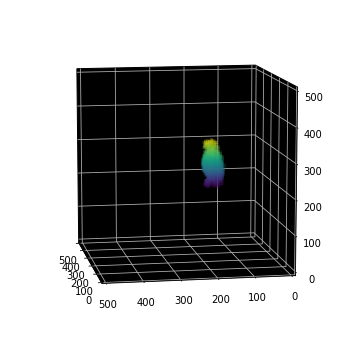

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 


%matplotlib inline
clouds = np.load('/data/birds/postures/birdview-2019/2019-06-08-13-16-12_BDY/2019-06-08-13-16-12_BDY_cloud.npy')

print(np.shape(clouds))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
f = 5

cloud_array = np.array(clouds[f])

color_map = cm.get_cmap('viridis')
z_max,z_min = np.max(cloud_array[:,2]),np.min(cloud_array[:,2])
z_range = z_max - z_min
"""
clip_points = np.load('./2019-06-24-11-46-15_BDY_clipped/pred_keypoints_3d.npy')
clip_points = clip_points * 1000
"""
for p in range(len(cloud_array)):
    height_ratio = (cloud_array[p,2] - z_min) / z_range
    ax.scatter(cloud_array[p,0],cloud_array[p,1],cloud_array[p,2],color=color_map(height_ratio),alpha=.1,s=5,marker='s')
    pass
"""
for k in range(len(clip_points[f])):
    ax.scatter(clip_points[f,k,0],clip_points[f,k,1],clip_points[f,k,2],color='red')
 """   
ax.w_xaxis.set_pane_color([0,0,0,1])
ax.w_yaxis.set_pane_color([0,0,0,1])
ax.w_zaxis.set_pane_color([0,0,0,1])

ax.view_init(10, 170)

ax.set_xlim([0,500])
ax.set_ylim([0,500])
ax.set_zlim([0,500])

fig.set_size_inches((6,6))
fig.show()

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 


%matplotlib inline
clouds = np.load('./2019-06-24-11-46-15_BDY_clipped/2019-06-24-11-46-15_BDY_clipped_cloud.npy')

print(np.shape(clouds))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
f = 5

cloud_array = np.array(clouds[f])

color_map = cm.get_cmap('viridis')
z_max,z_min = np.max(cloud_array[:,2]),np.min(cloud_array[:,2])
z_range = z_max - z_min

clip_points = np.load('./2019-06-24-11-46-15_BDY_clipped/pred_keypoints_3d.npy')
clip_points = clip_points * 1000

for p in range(len(cloud_array)):
    height_ratio = (cloud_array[p,2] - z_min) / z_range
    ax.scatter(cloud_array[p,0],cloud_array[p,1],cloud_array[p,2],color=color_map(height_ratio),alpha=.1,s=5,marker='s')
    pass

for k in range(len(clip_points[f])):
    ax.scatter(clip_points[f,k,0],clip_points[f,k,1],clip_points[f,k,2],color='red')
    
ax.w_xaxis.set_pane_color([0,0,0,1])
ax.w_yaxis.set_pane_color([0,0,0,1])
ax.w_zaxis.set_pane_color([0,0,0,1])

ax.view_init(10, 170)

ax.set_xlim([0,500])
ax.set_ylim([0,500])
ax.set_zlim([0,500])

fig.set_size_inches((6,6))
fig.savefig('/home/ammon/Desktop/PaperFigs/point_cloud_blank.png',dpi=300)
fig.show()

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [29]:
clip_points = np.load('./2019-06-24-11-46-15_BDY_clipped/pred_keypoints_3d.npy')
print(np.shape(clip_points))

(6, 20, 3)


In [118]:
from sklearn.decomposition import PCA
pca_points = PCA()
pca_points.fit(np.array(clouds[300]))
print(np.round(pca_points.explained_variance_ratio_,2))
output = pca_points.components_[:2]
print('5' + str(output.flatten()).replace('[','').replace(' ',',').replace(']',''))

[0.64 0.21 0.14]
5,0.38700851,-0.65667147,-0.64730749,-0.37713039,,0.52788199,-0.76099492


In [48]:
import cv2

cap = cv2.VideoCapture('/data/birds/postures/birdview-2019/2019-06-28-11-46-14_WG.wav.mp4')

while(1):
    ret,frame = cap.read()
    print(ret)
    if not ret:
        print('Done!')
        break

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [78]:
test2 = np.load('./2019-06-12-11-46-13_LNR_veryveryshort/pred_keypoints_3d.npy')

print(np.shape(test_3d))
print(np.shape(test2))
print(test_3d[0])
print(test2[0])


(20, 3, 13)
(20, 3, 13)
[[205. 245. 205. 425. 495. 205. 195. 225. 225. 225. 235. 225. 225.]
 [355. 185. 375. 135. 115. 385. 495. 195. 195. 195. 255. 455. 455.]
 [375. 325. 385. 375. 395. 385. 425. 325. 325. 325. 315. 425. 425.]]
[[220.5 220.5 300.5 220.5 300.5 340.5 300.5 300.5 320.5 340.5 300.5 320.5
  320.5]
 [200.5 200.5 200.5 200.5 200.5 220.5 200.5 200.5 200.5 220.5 200.5 220.5
  220.5]
 [320.5 320.5 300.5 320.5 300.5 285.5 300.5 300.5 300.5 300.5 300.5 240.5
  240.5]]


<IPython.core.display.Javascript object>


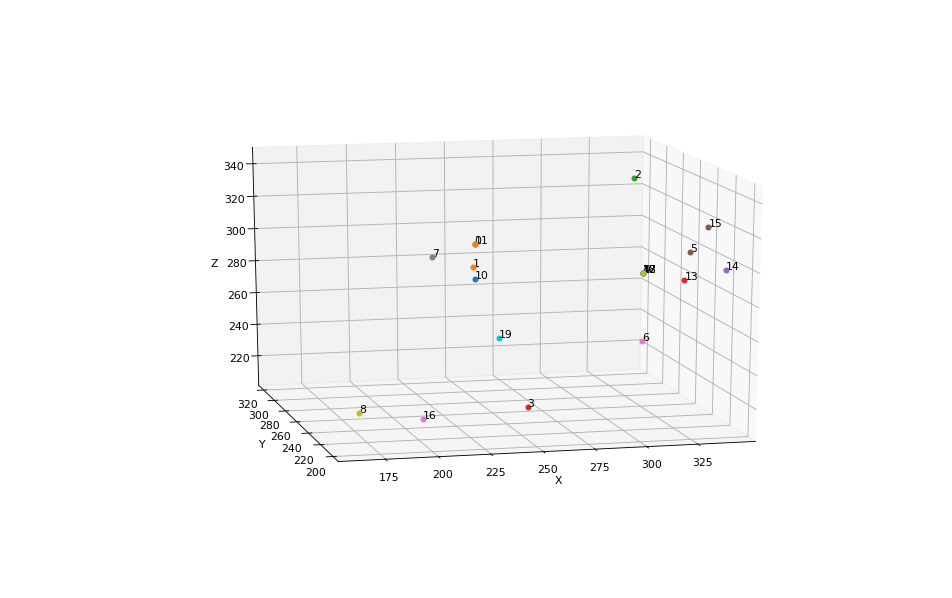

In [88]:
%matplotlib notebook
fig1 = plt.figure()
ax1 = fig1.add_subplot(111,projection='3d')

f = 0
for p in range(20):
    ax1.scatter(test2[p,0,f],test2[p,1,f],test2[p,2,f])
    ax1.text(test2[p,0,f],test2[p,1,f],test2[p,2,f],str(p))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

fig1.show()

<IPython.core.display.Javascript object>


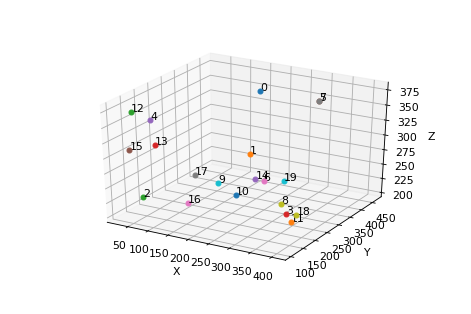

In [87]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

f = 0
for p in range(20):
    ax.scatter(test_3d[p,0,f],test_3d[p,1,f],test_3d[p,2,f])
    ax.text(test_3d[p,0,f],test_3d[p,1,f],test_3d[p,2,f],str(p))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.show()

In [65]:
tuple([50] * 3)

(50, 50, 50)

In [76]:
import itertools
all_points = np.array(list(itertools.product(np.arange(0,500,5),np.arange(0,500,5),np.arange(0,500,5))))
hom_points = np.ones([len(all_points),4])
hom_points[:,:3] = all_points / 1000
print(all_points,hom_points)

P_c = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
print(P_c.shape)
np.dot()

[[  0   0   0]
 [  0   0   5]
 [  0   0  10]
 ...
 [495 495 485]
 [495 495 490]
 [495 495 495]] [[0.    0.    0.    1.   ]
 [0.    0.    0.005 1.   ]
 [0.    0.    0.01  1.   ]
 ...
 [0.495 0.495 0.485 1.   ]
 [0.495 0.495 0.49  1.   ]
 [0.495 0.495 0.495 1.   ]]


In [89]:
for i in range(10):
    for j in range(10):
        break
    print(i)

0
1
2
3
4
5
6
7
8
9


In [100]:
np.unique(all_points,axis=0)

array([[  0,   0,   0],
       [  0,   0,   5],
       [  0,   0,  10],
       ...,
       [495, 495, 485],
       [495, 495, 490],
       [495, 495, 495]])

In [ ]:
import cv2
  
capture = cv2.VideoCapture('/data/birds/postures/TrainingPostures/bv-2019/2019-06-10-07-16-13_ND_clipped.mp4')
  
while(True):
      
    ret, frame = capture.read()
 
    grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    cv2.imshow('video gray', grayFrame)
    cv2.imshow('video original', frame)
      
    if cv2.waitKey(1) == 27:
        break

capture.release()
cv2.destroyAllWindows()

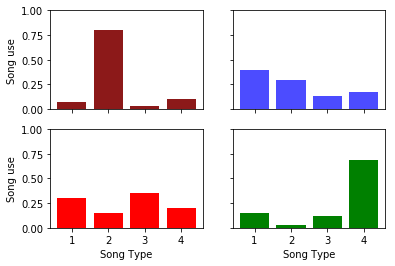

In [82]:
sample_data0 = [.30,.15,.35,.2]
sample_data1 = [.4,.3,.13,.17]
sample_data2 = [.07,.8,.03,.1]
sample_data3 = [.15,.03,.12,.69]

fig,axes = plt.subplots(2,2,sharey=True,sharex=True)
axes[1,0].bar(np.arange(1,5),sample_data0,color='red',label='Dominant Male')
axes[0,1].bar(np.arange(1,5),sample_data1,color='blue',alpha = .7,label='Pair Female')
axes[0,0].bar(np.arange(1,5),sample_data2,color='maroon',alpha=.9,label='Subordinant Male')
axes[1,1].bar(np.arange(1,5),sample_data3,color='green',label='Other Female')

axes[0,0].set_ylim(0,1)
axes[0,0].set_ylabel('Song use')
axes[1,0].set_xlabel('Song Type')
axes[1,0].set_ylabel('Song use')
axes[1,1].set_xlabel('Song Type')



fig.savefig('/home/ammon/Desktop/PaperFigs/fake_aviary.png',dpi=300)

/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


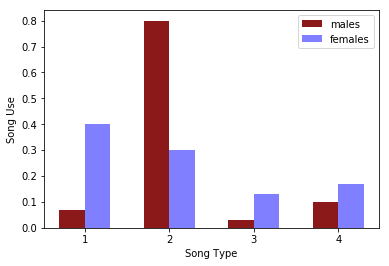

In [85]:
fig, ax = plt.subplots()
ax.bar(np.arange(1,5) - .15,sample_data2,color='maroon',alpha=.9,width=.3,label='males')
ax.bar(np.arange(1,5) +  .15,sample_data1,color='blue',alpha=.5,width=.3,label='females')
ax.set_xticks([1,2,3,4])
ax.set_xticklabels([1,2,3,4])
ax.set_xlabel('Song Type')
ax.set_ylabel('Song Use')
ax.legend()
fig.show()
fig.savefig('/home/ammon/Desktop/PaperFigs/fake_aviary2.png',dpi=300)